# Assignment 5
## Roll Number `31311`
### Data Visualisation - II

- Use the inbuilt dataset 'titanic' as used in the above problem.
- Plot a box plot for distribution of age with respect to each gender along with the information about whether they survived or not. 
- (Column names: 'sex' and 'age')


In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os 

In [24]:
os.listdir()

['Titanic-Dataset.csv', 'Assignment5.ipynb']

In [25]:
df = pd.read_csv("./Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
df.shape

(891, 12)

In [27]:
def display_all(dataFrame : pd.DataFrame):
    with pd.option_context('display.max_rows', 1000, 'display.max_columns', 1000):
        display(dataFrame.T)

display_all(df.describe(include='all'))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [28]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

## 1. Imputing missing values
### The titanic dataset has a LOT of missing values
#### I could not find the test and train splits so this dataset from the `COMPUTER DEPARTMENT PORTAL` will be used


- `Age` column has **177** missing values 
- `Cabin` column has **687** missing values

In [30]:
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=True)

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipykernel_14193/2813372668.py:1: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=True)


In [31]:
df['Title'].value_counts(sort=True)

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [32]:
title_maps = {
    'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr',
    'Don': 'Mr', 'Mme': 'Mrs', 'Jonkheer': 'Mr', 'Lady': 'Mrs',
    'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'
    }
# Replacing the titles with generic ones here, sp we'll have only 6 titles to deal with
df.replace({'Title':title_maps}, inplace=True)

In [33]:
age_by_title = dict(df.groupby('Title')['Age'].median())
df['median_age'] = df['Title'].apply(lambda x: age_by_title[x])

df.fillna({'Age': df['median_age']}, inplace=True)

In [34]:
del df['median_age']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


### 1.2 Impute Missing Fare Values


In [35]:
df['Cabin_Class'] = df['Cabin'].str[0]

median_cabin_fare = df.groupby('Cabin_Class')['Fare'].median().to_dict()

This is the median fare for the missing cabin values according the the class

In [36]:
median_cabin_fare

{'A': 35.5,
 'B': 80.0,
 'C': 83.475,
 'D': 53.1,
 'E': 45.18125,
 'F': 13.0,
 'G': 13.58125,
 'T': 35.5}

In [37]:
def assign_cabin(fare):
    closest_cabin = min(median_cabin_fare.keys(), key=lambda c : abs(median_cabin_fare[c] - fare))
    # the above line will iterate over the dict and give us the most probable value for the cabin
    return closest_cabin

In [38]:
df.loc[df['Cabin'].isna(), 'Cabin'] = df.loc[df['Cabin'].isna(), 'Fare'].apply(assign_cabin)

In [39]:
df.drop(columns=['Cabin_Class'], inplace=True)

In [40]:
df.loc[df['Embarked'].isna(), 'Embarked'] = df['Embarked'].mode()[0]

In [41]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

## Data Visualisation

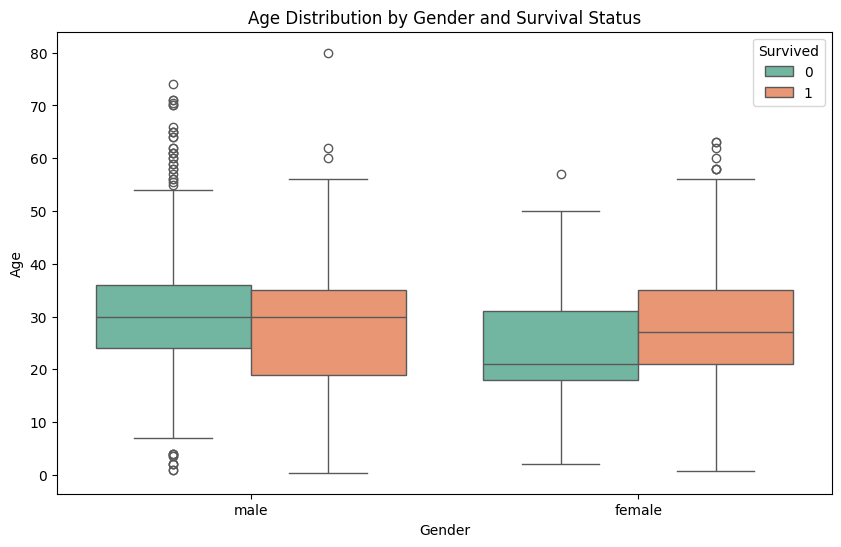

In [43]:
plt.figure(figsize=(10, 6))

# Use seaborn's boxplot function to create the plot
sns.boxplot(x='Sex', y='Age', hue='Survived', data=df, palette="Set2")

# Adding titles and labels
plt.title('Age Distribution by Gender and Survival Status')
plt.xlabel('Gender')
plt.ylabel('Age')

# Show the plot
plt.show()

/home/home/Coding-practice/Pict-Practicals/.venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 62.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/home/Coding-practice/Pict-Practicals/.venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 37.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/home/Coding-practice/Pict-Practicals/.venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 72.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/home/Coding-practice/Pict-Practicals/.venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 49.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot

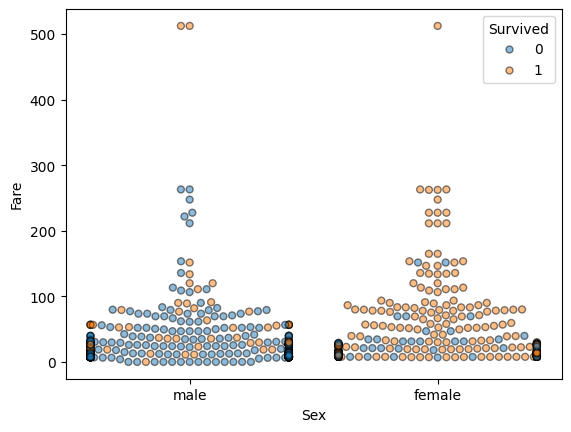

In [44]:
sns.swarmplot(x='Sex', y='Fare', hue='Survived', data=df, edgecolor="black",alpha=.5, s=5,linewidth=1.0)
plt.show()

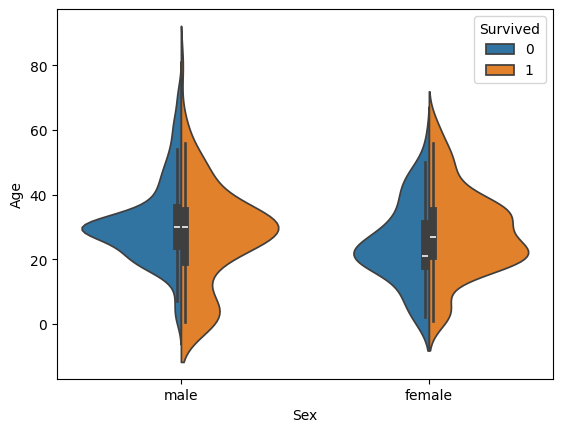

In [46]:
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df, split=True)
plt.show()

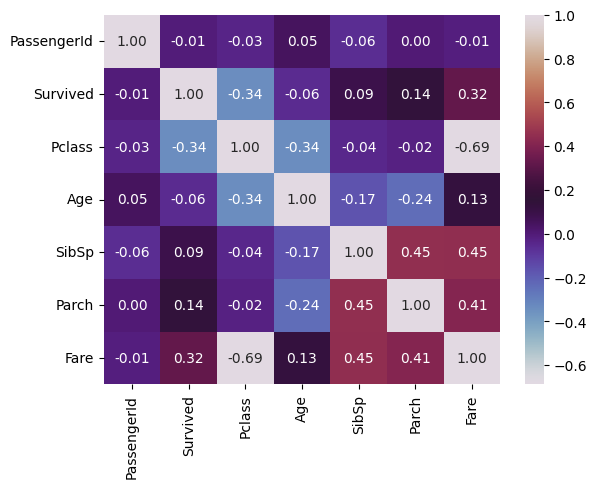

In [51]:
corr = df.corr('spearman', numeric_only=True)
sns.heatmap(corr, annot=True, cmap='twilight', fmt='.2f')
plt.show()

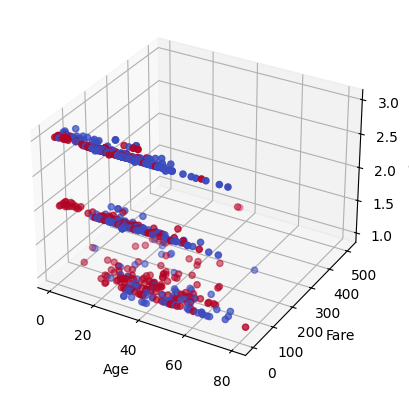

In [50]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Fare'], df['Pclass'], c=df['Survived'], cmap='coolwarm')
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.set_zlabel('Pclass')
plt.show()